# Iris Species

## Data Preparation

In [1]:
import pandas as pd

df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Separate the featues and the label.

In [3]:
y = df['Species']
X = df.drop('Species', axis=1)

## Data Wrangling

It seems that *Id* would not have any relationship with our later predictions. So drop it.

In [4]:
X.drop('Id', axis=1, inplace=True)

In [5]:
X.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Split the dataset into train and test parts.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Train Model

We are going to use a decision tree classifier.

In [7]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_classifier = DecisionTreeClassifier()

decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

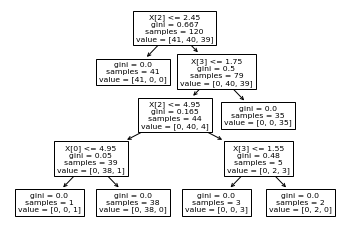

In [8]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plot_tree(decision_tree_classifier)
plt.show()

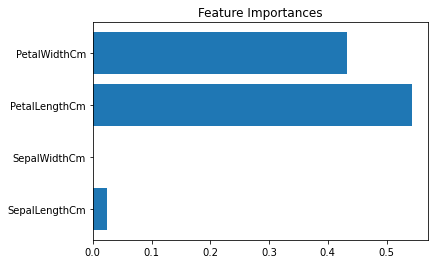

In [9]:
plt.title('Feature Importances')
plt.barh(range(4), decision_tree_classifier.feature_importances_, tick_label=X.columns)
plt.show()

## Test Model

In [10]:
accuracy = decision_tree_classifier.score(X_test, y_test)
print(f'Accuracy on the test dataset: {accuracy:.4f}')

Accuracy on the test dataset: 0.9000
